<a href="https://colab.research.google.com/github/tommyliverani/RulFramework/blob/main/Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow_datasets as tfds
from Model import Model
from Dataset import Dataset
from Framework import Rul_Framework

In [2]:
def select_rul(data):
    last_node=data['node'][0]
    last_anomaly=0
    for index,row in data.iterrows():
        if data['is_rising_anomaly'][index]==1:
            last_anomaly=index
        if last_node != data['node'][index]:
            for i in range(last_anomaly+1,index):
                data=data.drop(i)
        last_node = data['node'][index]
    for i in range(last_anomaly,data.index[-1]):
                data=data.drop(i+1)
    return data

In [7]:
url = 'https://raw.githubusercontent.com/tommyliverani/ExamonDataExtraction/master/examon-client-feature-newapi_py3/'

data= pd.read_csv(url + 'final_data/final_data_full.csv')
data= select_rul(data)

dt_in=dt_in = list(data.columns[2:-3])

In [8]:
framework=Rul_Framework(dt_in,'is_rising_anomaly',data)
framework.build_net([[64,'relu'],[64,'relu'],[64,'relu'],[64,'relu']])

In [10]:
framework.rul_estimation_with_transfer('node',0.8)

/content/Dataset.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.full_data['rul'][i]=index-i
/content/Dataset.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.full_data['rul'][index]=self.full_data['rul'][index]*1.0/max


Epoch 1/20
4435/4435 [==============================] - 7s 1ms/step - loss: 0.0954 - val_loss: 0.1416
Epoch 2/20
4435/4435 [==============================] - 6s 1ms/step - loss: 0.0502 - val_loss: 0.1445
Epoch 3/20
4435/4435 [==============================] - 6s 1ms/step - loss: 0.0426 - val_loss: 0.1533


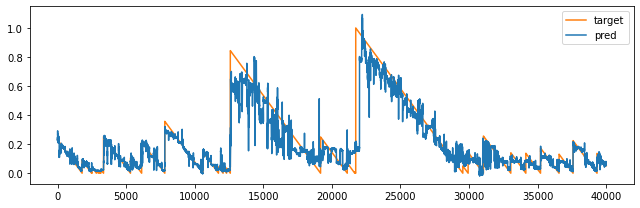

In [11]:
framework.print_prediction_on_training(40000)

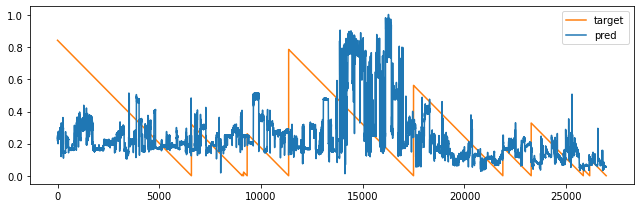

In [12]:
framework.print_prediction_on_test(40000)

In [13]:
mae=framework.mae_on_trainining()
print(f'{mae}')
mae=framework.mae_on_test()
print(f'{mae}')

0.06569138169288635
0.20035716891288757


In [15]:
framework.build_net([[64,'relu'],[64,'relu'],[64,'relu'],[64,'relu']])
framework.rul_estimation(0.8)

/content/Dataset.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.full_data['rul'][i]=index-i
/content/Dataset.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.full_data['rul'][index]=self.full_data['rul'][index]*1.0/max


Epoch 1/20
5274/5274 [==============================] - 8s 1ms/step - loss: 0.1081 - val_loss: 0.0839
Epoch 2/20
5274/5274 [==============================] - 8s 1ms/step - loss: 0.0664 - val_loss: 0.0546
Epoch 3/20
5274/5274 [==============================] - 8s 1ms/step - loss: 0.0531 - val_loss: 0.0457
Epoch 4/20
5274/5274 [==============================] - 8s 1ms/step - loss: 0.0443 - val_loss: 0.0396
Epoch 5/20
5274/5274 [==============================] - 8s 1ms/step - loss: 0.0382 - val_loss: 0.0348
Epoch 6/20
5274/5274 [==============================] - 8s 1ms/step - loss: 0.0351 - val_loss: 0.0373
Epoch 7/20
5274/5274 [==============================] - 8s 1ms/step - loss: 0.0326 - val_loss: 0.0301
Epoch 8/20
5274/5274 [==============================] - 8s 1ms/step - loss: 0.0300 - val_loss: 0.0282
Epoch 9/20
5274/5274 [==============================] - 8s 1ms/step - loss: 0.0291 - val_loss: 0.0273
Epoch 10/20
5274/5274 [==============================] - 8s 1ms/step - loss: 0.028

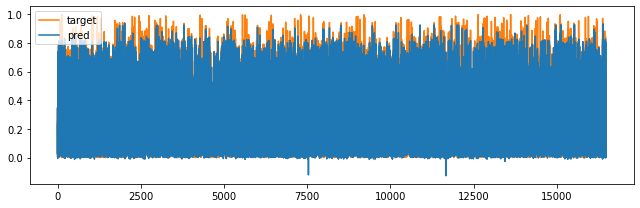

In [16]:
framework.print_prediction_on_test(40000)

In [17]:
mae=framework.mae_on_trainining()
print(f'{mae}')
mae=framework.mae_on_test()
print(f'{mae}')

0.02689085155725479
0.027593370527029037
